In [79]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE  import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [81]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/SinLogLowNoise/


In [82]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "Diff01_MSEs" in f:
        print(f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Hermite_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_MSEs.parquet


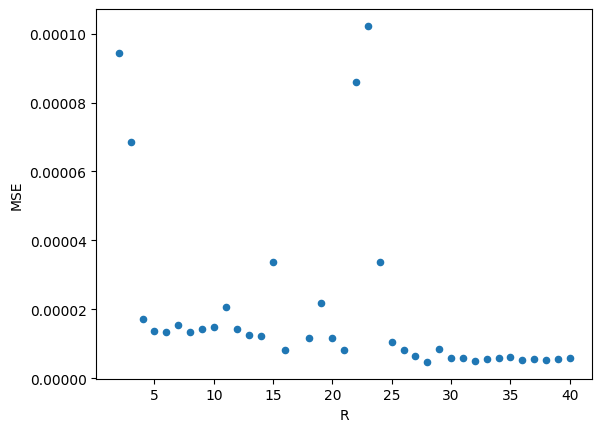

In [83]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [84]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
2      0.000094
3      0.000068
4      0.000017
5      0.000014
6      0.000013
7      0.000015
8      0.000014
9      0.000014
10     0.000015
11     0.000021
12     0.000014
13     0.000012
14     0.000012
15     0.000034
16     0.000008
17          NaN
18     0.000012
19     0.000022
20     0.000012
21     0.000008
22     0.000086
23     0.000102
24     0.000034
25     0.000010
26     0.000008
27     0.000007
28     0.000005
29     0.000009
30     0.000006
31     0.000006
32     0.000005
33     0.000005
34     0.000006
35     0.000006
36     0.000005
37     0.000006
38     0.000005
39     0.000005
40     0.000006


0    0.000005
Name: 28, dtype: float64


In [85]:
from configs import project_config
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Hermite_f{diradd.replace('LowNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/SinLogLowNoise/Hermite_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_28_drift_est.npy'

In [ ]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Hermite")
plt.legend()
plt.show()